In [46]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import cv2 
from tqdm import tqdm
import random 


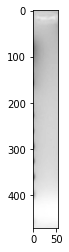

In [47]:
DATADIR = "/home/jhaseon/projects/covid/data"

CATEGORIES  = ["neg", "pos"]


for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!


In [48]:
print(img_array)

[[222 222 221 ... 214 214 214]
 [222 221 221 ... 214 214 213]
 [221 220 220 ... 213 213 212]
 ...
 [234 234 234 ... 237 237 237]
 [234 235 235 ... 236 236 236]
 [234 234 235 ... 236 235 235]]


In [49]:
print(img_array.shape)

(471, 53)


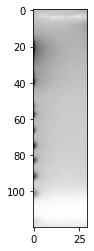

In [50]:
IMG_HEIGHT = 120
IMG_WIDTH = 30

new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
plt.imshow(new_array, cmap='gray')
plt.show()

In [51]:
training_data = []
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 82/82 [00:00<00:00, 1952.40it/s]

162


In [53]:
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
1
0
0
0
0
1
0
0
1


In [55]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ## convert list to numpy array

[[[[ 59]
   [ 27]
   [  2]
   ...
   [201]
   [197]
   [194]]

  [[ 60]
   [ 30]
   [  5]
   ...
   [210]
   [211]
   [210]]

  [[119]
   [107]
   [ 99]
   ...
   [212]
   [214]
   [216]]

  ...

  [[247]
   [247]
   [247]
   ...
   [248]
   [248]
   [248]]

  [[247]
   [247]
   [247]
   ...
   [247]
   [247]
   [247]]

  [[247]
   [247]
   [248]
   ...
   [248]
   [249]
   [249]]]]


In [56]:
import pickle 

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()